In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [2]:
pwd

u'/Users/laushon/General_Assembly/sfdat26_work/hw'

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [290]:
#businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=['application_date'], dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaT,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaT,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaT,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,2001-10-10,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [14]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=['date'])
inspections.head()

,business_id,Score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [15]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=['date'])
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [291]:
businesses.rename(columns={'TaxCode': 'tax_code'}, inplace=True)
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,tax_code,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaT,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaT,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaT,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,2001-10-10,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [17]:
inspections.rename(columns={'Score': 'score'}, inplace=True)
inspections.head()

,business_id,score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [18]:
violations.rename(columns={'ViolationTypeID': 'violation_type_id'}, inplace=True)
violations.head()

,business_id,date,violation_type_id,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [292]:
inspections.shape

(27285, 5)

In [20]:
violations.shape

(39720, 5)

In [21]:
businesses.shape

(7544, 16)

In [293]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
temp = pd.merge(inspections, violations, on=['business_id', 'date'], how='left')      #also on date, parse date, left join not inner
temp.head(30)

,business_id,score,date,type,month,violation_type_id,risk_category,description
0,10,NaN,2014-08-07,Reinspection/Followup,8,NaN,NaN,NaN
1,10,94.0,2014-07-29,Routine - Unscheduled,7,103129.0,Moderate Risk,Insufficient hot water or running water
2,10,94.0,2014-07-29,Routine - Unscheduled,7,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10,NaN,2014-01-24,Reinspection/Followup,1,NaN,NaN,NaN
4,10,92.0,2014-01-14,Routine - Unscheduled,1,103154.0,Low Risk,Unclean or degraded floors walls or ceilings
5,10,92.0,2014-01-14,Routine - Unscheduled,1,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...
6,10,92.0,2014-01-14,Routine - Unscheduled,1,103145.0,Low Risk,Improper storage of equipment utensils or linens
7,19,94.0,2014-11-10,Routine - Unscheduled,11,103145.0,Low Risk,Improper storage of equipment utensils or linens
8,19,94.0,2014-11-10,Routine - Unscheduled,11,103116.0,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19,94.0,2014-02-14,Routine - Unscheduled,2,103156.0,Low Risk,Permit license or inspection report not posted


In [294]:
temp.shape

(57303, 8)

In [24]:
restaurant_scores = pd.merge(businesses, temp, on='business_id')
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,tax_code,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,score,date,type,violation_type_id,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,2014-08-07,Reinspection/Followup,NaN,NaN,NaN
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,2014-07-29,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,2014-07-29,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,2014-01-24,Reinspection/Followup,NaN,NaN,NaN
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,2014-01-14,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings


In [25]:
restaurant_scores.shape

(57185, 22)

In [310]:
# 2 Which ten business have had the most inspections?

#inspections.groupby('business_id').date.count().sort_values(ascending=False).head(10)

inspections2 = pd.merge(businesses, inspections)
inspections2.groupby('name').date.count().sort_values(ascending=False).head(10)

name
Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
San Francisco Soup Company    44
STARBUCKS COFFEE              44
KENTUCKY FRIED CHICKEN        32
Lee's Deli                    31
Subway Sandwiches             31
Name: date, dtype: int64

In [33]:
# 3 Group and count the inspections by type

restaurant_scores.type.value_counts()

Routine - Unscheduled                42054
Reinspection/Followup                 6020
Complaint                             3150
New Ownership                         2660
New Construction                      1635
Non-inspection site visit             1003
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  141
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from datetime import datetime

In [38]:
inspections['month'] = inspections['date'].dt.month
inspections.head(20)

,business_id,score,date,type,month
0,10,NaN,2014-08-07,Reinspection/Followup,8
1,10,94.0,2014-07-29,Routine - Unscheduled,7
2,10,NaN,2014-01-24,Reinspection/Followup,1
3,10,92.0,2014-01-14,Routine - Unscheduled,1
4,19,94.0,2014-11-10,Routine - Unscheduled,11
5,19,94.0,2014-02-14,Routine - Unscheduled,2
6,19,96.0,2013-09-04,Routine - Unscheduled,9
7,24,96.0,2016-03-11,Routine - Unscheduled,3
8,24,96.0,2014-11-24,Routine - Unscheduled,11
9,24,96.0,2014-06-12,Routine - Unscheduled,6


In [39]:
inspections.month.dtype


dtype('int64')

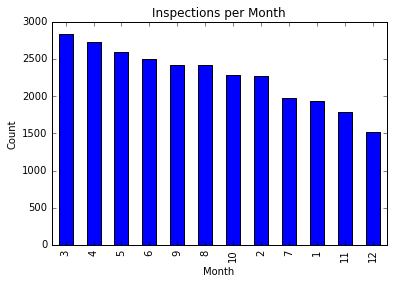

In [40]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap


inspections.month.value_counts().plot(kind='bar', title='Inspections per Month')
plt.xlabel('Month')
plt.ylabel('Count')

#How do I sort by month?

In [312]:
# 5 Which zip code contains the most high risk violations?

#restaurant_scores[['postal_code', 'risk_category']][restaurant_scores.risk_category=='High Risk'].head(10)

restaurant_scores[['postal_code', 'risk_category']][restaurant_scores.risk_category=="High Risk"].groupby('postal_code').count().sort_index(by='risk_category', ascending=False).head(5)

# 94133

/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,risk_category
postal_code,
94133,618
94103,569
94110,556
94122,460
94109,459


In [80]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

restaurant_scores[['type', 'risk_category']][restaurant_scores.type=='New Ownership'].groupby('risk_category').count()

# Low Risk

,type
risk_category,
High Risk,148
Low Risk,553
Moderate Risk,419


In [85]:
# 7 Examining the descriptions, what is the most common violation?

restaurant_scores.description.value_counts().head(5)

# Unclean or degraded floors walls or ceilings

Unclean or degraded floors walls or ceilings                          3746
Moderate risk food holding temperature                                2862
Inadequate and inaccessible handwashing facilities                    2689
Unapproved or unmaintained equipment or utensils                      2598
Wiping cloths not clean or properly stored or inadequate sanitizer    2504
Name: description, dtype: int64

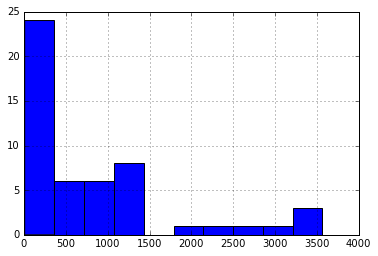

In [95]:
# 8 Create a hist of the scores with 10 bins

#restaurant_scores.score.value_counts().plot(kind='hist', bins=10, title='Inspection Scores')

restaurant_scores.score.value_counts().hist(bins=10)

In [87]:
# 9 Can you predict risk category based on the other features in this dataset?

# Yes. Based on type.













In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/



In [ ]:
############################
### A Little More Morbid ###
############################

In [96]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [98]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)
killings.head()


,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [101]:
# 2. Show the count of missing values in each column

killings.isnull().sum()


Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [106]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value='Unknown', inplace=True)

In [107]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [112]:
# 4. How many killings were there so far in 2015?

killings[killings.year==2015].year.value_counts()

# 467

2015    467
Name: year, dtype: int64

In [114]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

# Male: 445
# Female: 22

Male      445
Female     22
Name: gender, dtype: int64

In [120]:
# 6. How many killings were of unarmed people?
#killings[killings.armed=='No'].armed.value_counts()
killings[killings.armed=='No'].armed.count()

102

In [123]:
killings.shape[0]

467

In [130]:
# 7. What percentage of all killings were unarmed?

a = float(killings[killings.armed=='No'].armed.count())/killings.shape[0]
print("%.2f" % a)

0.22


In [132]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [134]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

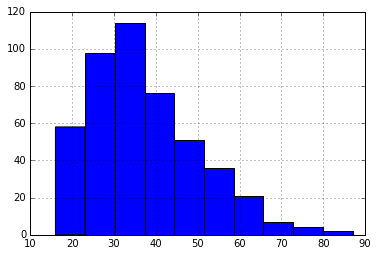

In [137]:
# 10. Display a histogram of ages of all killings

killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d220990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d796510>]], dtype=object)

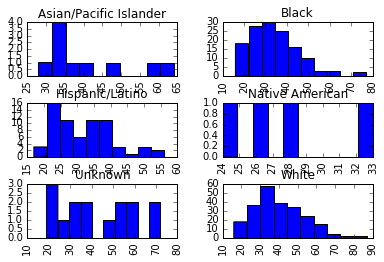

In [140]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)

In [146]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

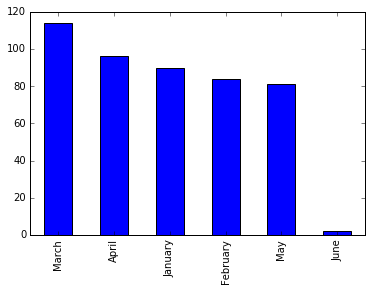

In [151]:
# 13. Show a bar chart with counts of deaths every month

killings.month.value_counts().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [170]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [171]:
majors.columns = [i.replace(' ','_').lower() for i in majors.columns]


In [172]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

del majors['employed_full_time_year_round']
del majors['major_code']

In [173]:
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [164]:
# 2. Show the cout of missing values in each column

majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [177]:
# 3. What are the top 10 highest paying majors?

majors[['major', 'median']].sort_index(by='median', ascending=False).head(10)

/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,major,median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


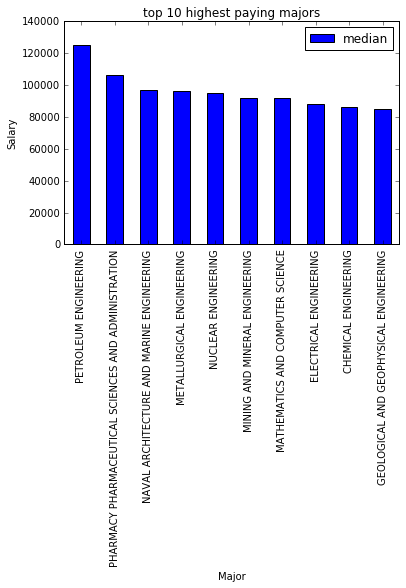

In [205]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
topten = majors[['major', 'median']].sort_index(by='median', ascending=False).head(10)
topten.plot(kind='bar', x='major', y='median', title='top 10 highest paying majors')
plt.xlabel('Major')
plt.ylabel('Salary')

In [216]:
# 5. What is the average median salary for each major category?
majors.rename(columns={'median': 'median_sal'}, inplace=True)
majors.groupby('major_category').median_sal.mean()


major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: median_sal, dtype: float64

In [245]:
# 6. Show only the top 5 paying major categories

top_five_categories = majors.groupby('major_category').median_sal.mean().to_frame(name='avg_median_salary')
top_five_categories.colums = ['major_categor', 'avg_median_salary']


In [254]:
top_five_categories.sort_values(by='avg_median_salary', ascending=False).head(5)

,avg_median_salary
major_category,
Engineering,77758.620690
Computers & Mathematics,66272.727273
Physical Sciences,62400.000000
Business,60615.384615
Health,56458.333333


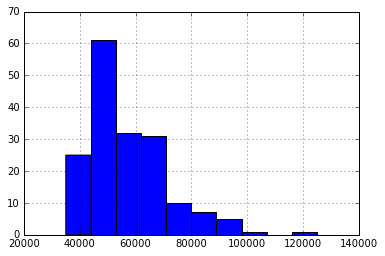

In [262]:
# 7. Plot a histogram of the distribution of median salaries

majors.median_sal.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124903410>]], dtype=object)

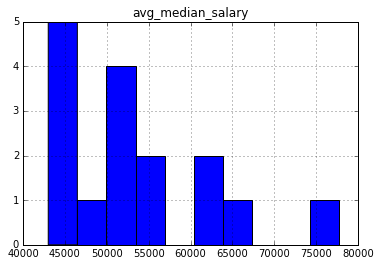

In [259]:
# 8. Plot a histogram of the distribution of median salaries by major category

top_five_categories.hist()

In [272]:
# 9. What are the top 10 most UNemployed majors?

majors[['major', 'unemployed']].sort_index(by='unemployed', ascending=False).head(10)

/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,major,unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [287]:
# What are the unemployment rates?

majors[['major', 'unemployment_rate']].sort_index(by='unemployment_rate', ascending=False).head(10)

/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,major,unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [286]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors.groupby('major_category').median_sal.mean().order(ascending=False)[:10]


/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Name: median_sal, dtype: float64

In [288]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.employed/majors.total
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median_sal,p25th,p75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [289]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 1 - majors.sample_employment_rate
majors.head()

,unnamed:_0,major,major_category,total,employed,unemployed,unemployment_rate,median_sal,p25th,p75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
